In [62]:
from PIL import Image
from skimage import measure
import numpy as np 
import pandas as pd 
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors
from mpl_toolkits.axes_grid1.inset_locator import inset_axes


Image_folder = 'Y:\coskun-lab\Thomas\Mayar-Data\Image'
Mask_folder = 'Y:\coskun-lab\Thomas\Mayar-Data\Mask'
Cluster_folder = 'Y:\coskun-lab\Thomas\Mayar-Data\Clusters'

%matplotlib inline

In [63]:
# Experiment
experiment = 'ROI007 Area 1'

markers = []
masks = []
data = None


# Read binary mask images
for (dirpath, dirnames, filenames) in os.walk(Mask_folder):
    for name in sorted(filenames):
        if 'BM' in name and experiment in name:        
            img = cv2.imread(os.path.join(dirpath,name),0)
            
            markers.append(name.split('_')[-1].split('.')[0])
            masks.append(img)

# Read cell mask images 
for (dirpath, dirnames, filenames) in os.walk(Mask_folder):
    for name in sorted(filenames):
        if 'Cell_Mask' in name and experiment in name:
            cell_mask = np.array(Image.open(os.path.join(dirpath,name)))
        
# Read all intensity images
for (dirpath, dirnames, filenames) in os.walk(Image_folder):
    for name in sorted(filenames):
        if 'tiff' in name and experiment in name:
            img = cv2.imread(os.path.join(dirpath,name),0)
            img = cv2.GaussianBlur(img, (21,21),0)
            img = img.astype(float)
            data = np.concatenate((data, img[:,:,None]), axis=2) if data is not None else img[:,:,None]
            
        
# Get cell with mask
cell_masks = []
for i in range(len(masks)):
# Apply cluster mask 
    res = cv2.bitwise_and(cell_mask,cell_mask,mask = masks[i])

    cell_masks.append(res)

# Apply mask
data2 = None
for i in range(len(masks)):
# Apply cluster mask 
    img = cv2.bitwise_and(data[:,:,i], data[:,:,i], mask = masks[i])
    data2 = np.concatenate((data2, img[:,:,None]), axis=2) if data2 is not None else img[:,:,None]
    
binary_masks = []
for i in range(len(cell_masks)):
    binary_masks.append(np.where(cell_masks[i] > 0, 1, 0) )
    
all_mask = sum(binary_masks)
X = [i for i in range(len(all_mask))]
Y = X

In [64]:
# Get the position of pankeratin, granzymeB and CD44 markers
for i, ele in enumerate(markers):
    if ele =='PanKeratin':
        n_pank = i
    elif ele == 'GranzymeB':
        n_gra = i
    elif ele == 'CD44':
        n_cd = i

In [65]:
# Define transparent colormap

colors = [(1,0,0,c) for c in np.linspace(0,1,100)]
cmapred = mcolors.LinearSegmentedColormap.from_list('mycmap', colors, N=255)
colors = [(0,0,1,c) for c in np.linspace(0,1,100)]
cmapblue = mcolors.LinearSegmentedColormap.from_list('mycmap', colors, N=255)
colors = [(0,1,0,c) for c in np.linspace(0,1,100)]
cmapgreen = mcolors.LinearSegmentedColormap.from_list('mycmap', colors, N=255)

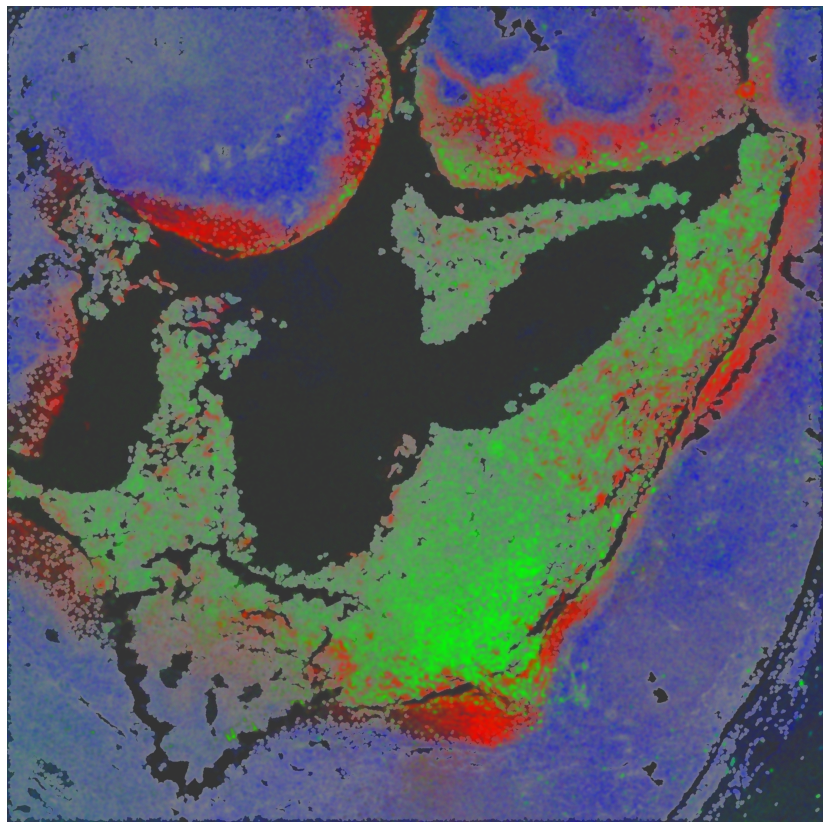

In [66]:
fig, ax = plt.subplots(figsize=(15,15))
ax.axis('off')
ax.imshow(np.where(cell_mask>0, 100, 0), cmap=plt.get_cmap('gray'), alpha = 0.8, vmin = 0 ,vmax = 255)
ax.imshow(data[:,:,n_cd], cmap=cmapblue, vmin = 0 ,vmax = data[:,:,n_cd].max())
ax.imshow(data[:,:,n_pank], cmap=cmapred, vmin = 0 ,vmax = data[:,:,n_pank].max())
ax.imshow(data[:,:,n_gra], cmap=cmapgreen, vmin = 0 ,vmax = data[:,:,n_gra].max())

# fig.savefig(experiment + '_cell.png', bbox_inches='tight') 

In [67]:
# fig, ax = plt.subplots(figsize=(15,15))
# ax.axis('off')
# ax.imshow(np.where(cell_mask>0, 100, 0), cmap=plt.get_cmap('gray'), alpha = 0.8, vmin = 0 ,vmax = 255)
# ax.imshow(data2[:,:,n_cd], cmap=cmapblue, vmin = 0 ,vmax = data[:,:,n_cd].max())
# ax.imshow(data2[:,:,n_pank], cmap=cmapred, vmin = 0 ,vmax = data[:,:,n_pank].max())
# ax.imshow(data2[:,:,n_gra], cmap=cmapgreen, vmin = 0 ,vmax = data[:,:,n_gra].max())

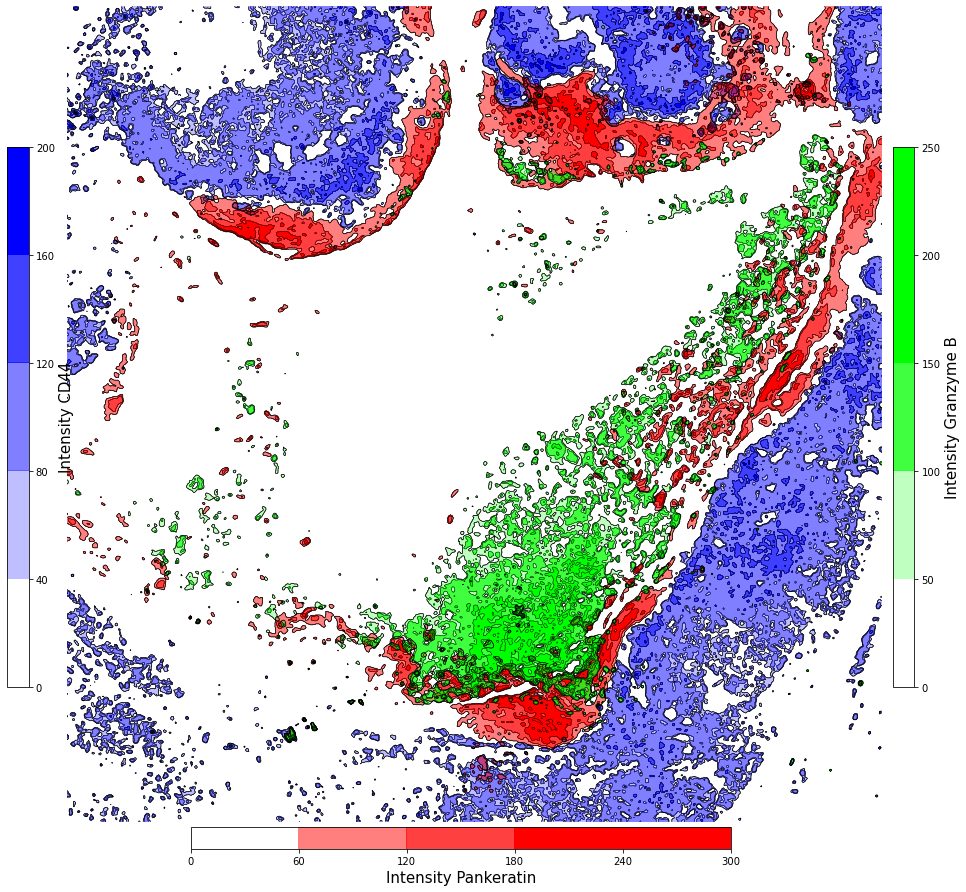

In [68]:
# Define transparent colormap

n_color = 4

colors = [(1,0,0,c) for c in np.linspace(0,1,100)]
cmapred = mcolors.LinearSegmentedColormap.from_list('mycmap', colors, N=n_color+1)
colors = [(0,0,1,c) for c in np.linspace(0,1,100)]
cmapblue = mcolors.LinearSegmentedColormap.from_list('mycmap', colors, N=n_color+1)
colors = [(0,1,0,c) for c in np.linspace(0,1,100)]
cmapgreen = mcolors.LinearSegmentedColormap.from_list('mycmap', colors, N=n_color+1)

fig, ax = plt.subplots(figsize=(15,15))
ax.axis('off')
ax.imshow(np.where(cell_mask>0, 100, 0), cmap=plt.get_cmap('gray'), alpha = 0.0, vmin = 0 ,vmax = 255)
ctr1 = ax.contourf(X, Y, data2[:,:,n_cd], n_color, cmap=cmapblue, vmin = 0 ,vmax = data2[:,:,n_cd].max());
ax.contour(X, Y,  data2[:,:,n_cd], ctr1.levels, colors='k', linewidths = 0.5)
ctr2 = ax.contourf(X, Y, data2[:,:,n_pank], n_color, cmap=cmapred, vmin = 0 ,vmax = data2[:,:,n_cd].max());
ax.contour(X, Y,  data2[:,:,n_pank], ctr2.levels, colors='k', linewidths = 0.5)
ctr3 = ax.contourf(X, Y, data2[:,:,n_gra], n_color, cmap=cmapgreen, vmin = 0 ,vmax = data2[:,:,n_cd].max());
ax.contour(X, Y,  data2[:,:,n_gra], ctr3.levels, colors='k', linewidths = 0.5)

# Add colorbar to figure 
axins1 = fig.add_axes([0.08, 0.25, 0.02, 0.5])
axins2 = fig.add_axes([0.25, 0.1, 0.5, 0.02])
axins3 = fig.add_axes([0.9, 0.25, 0.02, 0.5])

cb1 = fig.colorbar(ctr1, cax=axins1, orientation="vertical")
cb2 = fig.colorbar(ctr2, cax=axins2, orientation="horizontal")
cb3 = fig.colorbar(ctr3, cax=axins3, orientation="vertical")

cb1.set_label(label = 'Intensity CD44', size=15)
cb2.set_label(label = 'Intensity Pankeratin', size=15)
cb3.set_label(label = 'Intensity Granzyme B', size=15)

# fig.savefig(experiment + '_altitude.png', bbox_inches='tight') 

In [69]:
# Define transparent colormap

n_color = 10

colors = [(1,0,0,c) for c in np.linspace(0,1,100)]
cmapred = mcolors.LinearSegmentedColormap.from_list('mycmap', colors, N=n_color)
colors = [(0,0,1,c) for c in np.linspace(0,1,100)]
cmapblue = mcolors.LinearSegmentedColormap.from_list('mycmap', colors, N=n_color)
colors = [(0,1,0,c) for c in np.linspace(0,1,100)]
cmapgreen = mcolors.LinearSegmentedColormap.from_list('mycmap', colors, N=n_color)

# fig, ax = plt.subplots(figsize=(15,15))
# ax.axis('off')
# ax.imshow(np.where(cell_mask>0, 100, 0), cmap=plt.get_cmap('gray'), alpha = 0.0, vmin = 0 ,vmax = 255)
ctr1 = ax.contourf(X, Y, data2[:,:,n_cd], n_color, cmap=cmapblue, vmin = 0 ,vmax = data[:,:,n_cd].max());
ax.contour(X, Y,  data2[:,:,n_cd], ctr1.levels, colors='k', linewidths = 0.5)
ctr2 = ax.contourf(X, Y, data2[:,:,n_pank], n_color, cmap=cmapred, vmin = 0 ,vmax = data[:,:,n_cd].max());
ax.contour(X, Y,  data2[:,:,n_pank], ctr2.levels, colors='k', linewidths = 0.5)
ctr3 = ax.contourf(X, Y, data2[:,:,n_gra], n_color, cmap=cmapgreen, vmin = 0 ,vmax = data[:,:,n_cd].max());
ax.contour(X, Y,  data2[:,:,n_gra], ctr3.levels, colors='k', linewidths = 0.5)

# 3D plot

In [70]:
from skimage.transform import rescale

def get_step_image(img, ctr):
    levels = np.append(ctr.levels, [255.])

    for i in range(len(levels[1:])):
        img = np.where((levels[i-1] <= img) & ( img < levels[i]), levels[i-1], img)
    return img/10
    
img_cd = get_step_image(rescale(data2[:,:,n_cd], 0.1, anti_aliasing=True), ctr1)
img_pa = get_step_image(rescale(data2[:,:,n_pank], 0.1, anti_aliasing=True), ctr2)
img_ga = get_step_image(rescale(data2[:,:,n_gra], 0.1, anti_aliasing=True), ctr3)

In [71]:
x = [i for i in range(img_cd.shape[0])]
x = x[::-1]
y = [i for i in range(img_cd.shape[1])]

In [72]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Surface(x=x, y=y, z=img_cd, colorscale='Blues', 
                                 contours = {"z": {"show": True, "start": 0, "end": 25, "size": 5}},
                                ),
                     go.Surface(x=x, y=y, z=img_ga, colorscale='Greens',
                               contours = {"z": {"show": True, "start": 0, "end": 25, "size": 5}},
                                opacity=0.95
                               ),
                     go.Surface(x=x, y=y, z=img_pa, colorscale='Reds',
                               contours = {"z": {"show": True, "start": 0, "end": 25, "size": 5}},
                                opacity=0.95
                               )
                     ])

# Set figure size
fig.update_layout(autosize=False,
                  width=1000, height=1000,
                  margin=dict(l=65, r=50, b=65, t=90)
                 )

# No color bar
fig.update_traces(showscale=False)

# x_eye = 0
# y_eye = 3
# z_eye = 2

x_eye = 0
y_eye = 0
z_eye = 2.5

# Set white background and no axis for 3d plot
fig.update_layout(template='simple_white', plot_bgcolor='rgba(0,0,0,0)',
                  scene_camera_eye=dict(x=x_eye, y=y_eye, z=z_eye),
                  scene =  {'aspectmode':'data',
                            'xaxis_title': '',
                            'yaxis_title': '',
                            'zaxis_title': '',
                            'xaxis': {'backgroundcolor': 'white',
                                    'gridcolor': 'rgb(0,0,0)',
                                    'gridwidth': 2,
                                    'linecolor': 'rgb(0,0,0)',
                                    'showbackground': True,
                                    'showgrid': False,
                                    'showline': False,
                                    'showticklabels': False,
                                    'ticks': '',
                                    'zeroline': False,
                                    'zerolinecolor': 'rgb(0,0,0)'},
                            'yaxis': {'backgroundcolor': 'white',
                                    'gridcolor': 'rgb(0,0,0)',
                                    'gridwidth': 2,
                                    'linecolor': 'rgb(0,0,0)',
                                    'showbackground': True,
                                    'showgrid': False,
                                    'showline': False,
                                    'showticklabels': False,
                                    'ticks': '',
                                    'zeroline': False,
                                    'zerolinecolor': 'rgb(0,0,0)'},
                            'zaxis': {'backgroundcolor': 'white',
                                    'gridcolor': 'rgb(0,0,0)',
                                    'gridwidth': 2,
                                    'linecolor': 'rgb(0,0,0)',
                                    'showbackground': True,
                                    'showgrid': False,
                                    'showline': False,
                                    'showticklabels': False,
                                    'ticks': '',
                                    'zeroline': False,
                                    'zerolinecolor': 'rgb(0,0,0)'}}
                 )

# # Set black background for animation plot
# fig.update_layout(template='plotly_dark',
#                   scene_camera_eye=dict(x=x_eye, y=y_eye, z=z_eye),
#                   scene =  {'aspectmode':'data'},
#                   updatemenus=[dict(type='buttons',
#                   showactive=False,
#                   y=1,
#                   x=0.8,
#                   xanchor='left',
#                   yanchor='bottom',
#                   pad=dict(t=45, r=10),
#                   buttons=[dict(label='Play',
#                                  method='animate',
#                                  args=[None, dict(frame=dict(duration=5, redraw=True), 
#                                                              transition=dict(duration=0),
#                                                              fromcurrent=True,
#                                                              mode='immediate'
#                                                             )]
#                                             )
#                                       ]
#                               )
#                         ]
#                  )

# fig.update_scenes(xaxis_visible=False, yaxis_visible=False,zaxis_visible=False )


# def rotate_z(x, y, z, theta):
#     w = x+1j*y
#     return np.real(np.exp(1j*theta)*w), np.imag(np.exp(1j*theta)*w), z

# frames=[]
# for t in np.arange(0, 6.26, 0.01):
#     xe, ye, ze = rotate_z(x_eye, y_eye, z_eye, -t)
#     frames.append(go.Frame(layout=dict(scene_camera_eye=dict(x=xe, y=ye, z=ze))))
# fig.frames=frames

fig.show()


In [73]:
# fig.write_html(experiment + ".html")

In [74]:
import plotly

# plotly.io.write_image(fig, experiment + "_3d.png", scale = 3.0)